In [9]:
from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_nest.config import *
config = Config()
config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'

from tvb_multiscale.plot.plotter import Plotter
plotter = Plotter(config)

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

2020-01-09 11:50:45,975 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# from tvb.datatypes.connectivity import Connectivity
# connectivity = Connectivity.from_file(config.DEFAULT_CONNECTIVITY_ZIP)
# connectivity.configure()
# plotter.plot_tvb_connectivity(connectivity)

In [3]:
# from tvb_multiscale.simulator_tvb.simulator import Simulator
# from tvb_multiscale.simulator_tvb.models.reduced_wong_wang_exc_io_inh_i \
#     import ReducedWongWangExcIOInhI
# from tvb.simulator.monitors import Raw  # , Bold, EEG

# # Create a TVB simulator and set all desired inputs
# # (connectivity, model, surface, stimuli etc)
# # We choose all defaults in this example
# simulator = Simulator()
# simulator.model = ReducedWongWangExcIOInhI()
    
# simulator.connectivity = connectivity
# simulator.integrator.dt = \
#     float(int(np.round(simulator.integrator.dt / 
#                        config.nest.NEST_MIN_DT))) * config.nest.NEST_MIN_DT
# simulator.integrator.noise.nsig = np.array([0.001])

# mon_raw = Raw(period=simulator.integrator.dt)
# # Some extra monitors for neuroimaging measures:
# # mon_bold = Bold(period=2000.)
# # mon_eeg = EEG(period=simulator.integrator.dt)
# simulator.monitors = (mon_raw, )  # mon_bold, mon_eeg

In [4]:
# # Select the regions for the fine scale modeling with NEST spiking networks
# number_of_regions = simulator.connectivity.region_labels.shape[0]
# nest_nodes_ids = []  # the indices of fine scale regions modeled with NEST
# # We model parahippocampal cortices (left and right) with NEST
# for id in range(number_of_regions):
#     if simulator.connectivity.region_labels[id].find("hippo") > 0:
#         nest_nodes_ids.append(id)

In [5]:
# tvb_weights = connectivity.scaled_weights(mode='region')
# nest_nodes_labels = lambda indices=nest_nodes_ids: connectivity.region_labels[indices]

In [11]:
from tvb_nest.nest_models.builders.nest_factory import load_nest, compile_modules
nest_instance = load_nest(config)
compile_modules("iaf_cond_deco2014", config=config)

2020-01-09 11:50:57,103 - INFO - tvb_nest.nest_models.builders.nest_factory - Loading a NEST instance...
2020-01-09 11:50:57,103 - INFO - tvb_nest.nest_models.builders.nest_factory - Loading a NEST instance...
2020-01-09 11:50:57,107 - INFO - tvb_nest.nest_models.builders.nest_factory - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2020-01-09 11:50:57,107 - INFO - tvb_nest.nest_models.builders.nest_factory - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2020-01-09 11:50:57,112 - INFO - tvb_nest.nest_models.builders.nest_factory - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2020-01-09 11:50:57,112 - INFO - tvb_nest.nest_models.builders.nest_factory - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2020-01-09 11:50:57,115 - INFO - tvb_nest.nest_models.builders.nest_factory - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2020-01-09 11:50:57,115 - INFO - tvb_nest.nest_models.builders.nest_factory - NEST_DOC_DIR: /home/

2020-01-09 11:50:57,141 - INFO - tvb_nest.nest_models.builders.nest_factory - Compiling iaf_cond_deco2014...
2020-01-09 11:50:57,141 - INFO - tvb_nest.nest_models.builders.nest_factory - Compiling iaf_cond_deco2014...
2020-01-09 11:50:57,144 - INFO - tvb_nest.nest_models.builders.nest_factory - from in build_interfaces directory /home/docker/packages/tvb-multiscale/tvb_nest/nest/modules_builds/iaf_cond_deco2014...
2020-01-09 11:50:57,144 - INFO - tvb_nest.nest_models.builders.nest_factory - from in build_interfaces directory /home/docker/packages/tvb-multiscale/tvb_nest/nest/modules_builds/iaf_cond_deco2014...
2020-01-09 11:50:57,149 - INFO - tvb_nest.nest_models.builders.nest_factory - Running compilation...
2020-01-09 11:50:57,149 - INFO - tvb_nest.nest_models.builders.nest_factory - Running compilation...
2020-01-09 11:51:03,610 - WARNING - tvb_nest.nest_models.builders.nest_factory - Something seems to have gone wrong with compiling iaf_cond_deco2014!
2020-01-09 11:51:03,610 - WARN

In [12]:
nest_instance.Install("iaf_cond_deco2014module")
nest_instance.Models()

('ac_generator',
 'aeif_cond_alpha',
 'aeif_cond_alpha_RK5',
 'aeif_cond_alpha_multisynapse',
 'aeif_cond_beta_multisynapse',
 'aeif_cond_exp',
 'aeif_psc_alpha',
 'aeif_psc_delta',
 'aeif_psc_delta_clopath',
 'aeif_psc_exp',
 'amat2_psc_exp',
 'bernoulli_synapse',
 'bernoulli_synapse_lbl',
 'clopath_synapse',
 'clopath_synapse_lbl',
 'cont_delay_synapse',
 'cont_delay_synapse_hpc',
 'cont_delay_synapse_lbl',
 'correlation_detector',
 'correlomatrix_detector',
 'correlospinmatrix_detector',
 'dc_generator',
 'diffusion_connection',
 'diffusion_connection_lbl',
 'erfc_neuron',
 'gamma_sup_generator',
 'gap_junction',
 'gap_junction_lbl',
 'gauss_rate_ipn',
 'gif_cond_exp',
 'gif_cond_exp_multisynapse',
 'gif_pop_psc_exp',
 'gif_psc_exp',
 'gif_psc_exp_multisynapse',
 'ginzburg_neuron',
 'hh_cond_beta_gap_traub',
 'hh_cond_exp_traub',
 'hh_psc_alpha',
 'hh_psc_alpha_clopath',
 'hh_psc_alpha_gap',
 'ht_neuron',
 'ht_synapse',
 'ht_synapse_hpc',
 'ht_synapse_lbl',
 'iaf_chs_2007',
 'iaf_ch

In [ ]:
# w_ee = 1.4
# J_i = 1.0
# population_order = 100
# exc_pop_scale = 1
# exc_pop_size = int(population_order * exc_pop_scale)
# default_population = {"model": "iaf_cond_deco2014", "scale": 1, "params": {}, "nodes": None}
# populations = [
#     {"label": "E", "model": default_population["model"],
#      "nodes": None,  # None means "all"
#      "params": lambda node_index:
#          {"w_E_ext": tvb_weights[:, list(nest_nodes_ids).index(node_index)],
#           "w_E": w_ee, "w_I": J_i, "N_E": exc_pop_size}, 
#      "scale": exc_pop_scale},
#     {"label": "I", "model": default_population["model"],
#      "nodes": None,  # None means "all"
#      "params": lambda node_index:
#          {"w_E_ext": tvb_weights[:, list(nest_nodes_ids).index(node_index)],
#           "w_E": 1.0, "w_I": 1.0, "N_E": exc_pop_size},
#      "scale": 0.7}]

In [ ]:
# from pandas import Series
# spiking_nodes = Series()
# for node_id, node_label in zip(nest_nodes_ids, nest_nodes_labels()):
#     print(node_id, node_label)
#     spiking_nodes[node_label] = Series()
#     for iP, population in enumerate(populations):
#         print(iP, population["label"])
#         if population["nodes"] is None or node_id in population["nodes"]:
#             params=population["params"](node_id)
#             print(params)
#             print(params["w_E_ext"].shape)
#             spiking_nodes[node_label][population["label"]] = \
#                 nest_instance.Create(population["model"], 
#                                      int(np.round(population["scale"] * population_order)), 
#                                      params=params)

In [13]:
ex = nest_instance.Create("iaf_cond_deco2014", 
                          params={"w_E_ext": [10.0, 10.0], "s_AMPA_ext_max": [1.0, 1.0], "w_I": 0.1})
inh = nest_instance.Create("iaf_cond_deco2014", 
                           params={"w_E_ext": [10.0, 10.0], "w_E": 1.0, "s_AMPA_ext_max": [1.0, 1.0]})

In [14]:
nest_instance.GetStatus(ex)

({'alpha': 0.5,
  'archiver_length': 0,
  'beta': 0.062,
  'beta_Ca': 0.001,
  'C_m': 500.0,
  'Ca': 0.0,
  'E_ex': 0.0,
  'E_in': -70.0,
  'E_L': -70.0,
  'element_type': <SLILiteral: neuron>,
  'frozen': False,
  'g_AMPA': 0.065,
  'g_GABA_A': 10.94,
  'g_L': 25.0,
  'g_NMDA': 0.2,
  'global_id': 1,
  'gsl_error_tol': 1e-06,
  'has_connections': False,
  'I_e': 0.0,
  'local': True,
  'local_id': 1,
  'model': <SLILiteral: iaf_cond_deco2014>,
  'n_receptors': 2,
  'node_uses_wfr': False,
  'parent': 0,
  'post_trace': 0.0,
  'recordables': (<SLILiteral: I_e>,
   <SLILiteral: V_m>,
   <SLILiteral: s_AMPA>,
   <SLILiteral: s_GABA>,
   <SLILiteral: x_NMDA>,
   <SLILiteral: s_NMDA>,
   <SLILiteral: I_L>,
   <SLILiteral: I_AMPA>,
   <SLILiteral: I_NMDA>,
   <SLILiteral: I_GABA>,
   <SLILiteral: spikes_exc>,
   <SLILiteral: spikes_inh>,
   <SLILiteral: s_AMPA_ext_0>,
   <SLILiteral: I_AMPA_ext_0>,
   <SLILiteral: spikes_exc_ext_0>,
   <SLILiteral: s_AMPA_ext_1>,
   <SLILiteral: I_AMPA_ext_

In [15]:
nest_instance.GetStatus(inh)

({'alpha': 0.5,
  'archiver_length': 0,
  'beta': 0.062,
  'beta_Ca': 0.001,
  'C_m': 500.0,
  'Ca': 0.0,
  'E_ex': 0.0,
  'E_in': -70.0,
  'E_L': -70.0,
  'element_type': <SLILiteral: neuron>,
  'frozen': False,
  'g_AMPA': 0.065,
  'g_GABA_A': 10.94,
  'g_L': 25.0,
  'g_NMDA': 0.2,
  'global_id': 2,
  'gsl_error_tol': 1e-06,
  'has_connections': False,
  'I_e': 0.0,
  'local': True,
  'local_id': 2,
  'model': <SLILiteral: iaf_cond_deco2014>,
  'n_receptors': 2,
  'node_uses_wfr': False,
  'parent': 0,
  'post_trace': 0.0,
  'recordables': (<SLILiteral: I_e>,
   <SLILiteral: V_m>,
   <SLILiteral: s_AMPA>,
   <SLILiteral: s_GABA>,
   <SLILiteral: x_NMDA>,
   <SLILiteral: s_NMDA>,
   <SLILiteral: I_L>,
   <SLILiteral: I_AMPA>,
   <SLILiteral: I_NMDA>,
   <SLILiteral: I_GABA>,
   <SLILiteral: spikes_exc>,
   <SLILiteral: spikes_inh>,
   <SLILiteral: s_AMPA_ext_0>,
   <SLILiteral: I_AMPA_ext_0>,
   <SLILiteral: spikes_exc_ext_0>,
   <SLILiteral: s_AMPA_ext_1>,
   <SLILiteral: I_AMPA_ext_

In [16]:
print(nest_instance.GetKernelStatus("resolution"))
nest_instance.Connect(ex, inh, syn_spec={"receptor_type": 0, "weight": 1.0, 
                                         "delay": nest_instance.GetKernelStatus("min_delay")})
nest_instance.Connect(inh, ex, syn_spec={"receptor_type": 0, "weight": -1.0, 
                                         "delay": nest_instance.GetKernelStatus("min_delay")})

0.1


In [17]:
pg1 = nest_instance.Create("inhomogeneous_poisson_generator", 
                          params={"allow_offgrid_times": False}
#                            params={# "rate": 0.0,
#                                    "p_copy": 1.0}
                         )
# pg1 = nest_instance.Create("poisson_generator", 
# #                             params={# "rate": 1000.0,
# #                                     "origin": nest_instance.GetKernelStatus("time"),
# #                                     "start": nest_instance.GetKernelStatus("min_delay"),
# #                                     "stop": 2000.0}
#                          )
nest_instance.Connect(pg1, ex, syn_spec={"receptor_type": 1, 
                                            "delay": 110*nest_instance.GetKernelStatus("min_delay")})
pg2 = nest_instance.Create("poisson_generator", 
                          params={"rate": 100.0,
                                  "origin": nest_instance.GetKernelStatus("time"),
                                  "start": nest_instance.GetKernelStatus("min_delay"),
                                  })#"stop": 100.0
nest_instance.Connect(pg2, inh, syn_spec={"receptor_type": 2, 
                                          "delay": 110*nest_instance.GetKernelStatus("min_delay")})

In [18]:
nest_instance.GetStatus(nest_instance.GetConnections(pg1))

({'delay': 11.0,
  'receptor': 1,
  'sizeof': 32,
  'source': 3,
  'synapse_model': <SLILiteral: static_synapse>,
  'target': 1,
  'weight': 1.0},)

In [19]:
sd = nest_instance.Create("spike_detector")
nest_instance.Connect(ex+inh, sd)
record_from=["spikes_exc", "spikes_inh", 
             "spikes_exc_ext_0", "spikes_exc_ext_1", 
             "s_AMPA", "x_NMDA", "s_NMDA", "s_GABA", 
             "s_AMPA_ext_0", "s_AMPA_ext_1", 
             "I_AMPA", "I_NMDA", "I_GABA", 
             "I_AMPA_ext_0", "I_AMPA_ext_1", 
             "V_m"]
mex = nest_instance.Create("multimeter", params={"withtime": True, "withgid": True, 
                                                 "interval": nest_instance.GetKernelStatus("resolution"),
                                                 "record_from": record_from})
nest_instance.Connect(mex, ex)
minh = nest_instance.Create("multimeter", params={"withtime": True, "withgid": True, 
                                                  "interval": nest_instance.GetKernelStatus("resolution"),
                                                  "record_from": record_from})
nest_instance.Connect(minh, inh)

In [20]:
nest_instance.Prepare()
print(nest_instance.GetKernelStatus("time"))
for ii in range(20):
#     nest_instance.Set(pg1, params={"rate": (ii + 1)*100.0, # "p_copy": 1.0, 
# #                                         'origin': nest_instance.GetKernelStatus("time"), 
# #                                         "start": nest_instance.GetKernelStatus("min_delay"),
# #                                         "stop": 200.0
#                                         })
    nest_instance.SetStatus(pg1, 
                            {"rate_times": [nest_instance.GetKernelStatus("time") +
                                            nest_instance.GetKernelStatus("resolution")],
                             "rate_values": [(ii + 1)*100.0]})
    nest_instance.Run(100.0)
    print(nest_instance.GetKernelStatus("time"))
    print(nest_instance.GetStatus(pg1))

0.0
100.0
({'allow_offgrid_times': False, 'element_type': <SLILiteral: stimulator>, 'frozen': False, 'global_id': 3, 'local': True, 'local_id': 3, 'model': <SLILiteral: inhomogeneous_poisson_generator>, 'node_uses_wfr': False, 'origin': 0.0, 'parent': 0, 'rate_times': array([0.1]), 'rate_values': array([100.]), 'start': 0.0, 'stop': 1.7976931348623157e+308, 'supports_precise_spikes': False, 'thread': 0, 'thread_local_id': 2, 'vp': 0},)
200.0
({'allow_offgrid_times': False, 'element_type': <SLILiteral: stimulator>, 'frozen': False, 'global_id': 3, 'local': True, 'local_id': 3, 'model': <SLILiteral: inhomogeneous_poisson_generator>, 'node_uses_wfr': False, 'origin': 0.0, 'parent': 0, 'rate_times': array([100.1]), 'rate_values': array([200.]), 'start': 0.0, 'stop': 1.7976931348623157e+308, 'supports_precise_spikes': False, 'thread': 0, 'thread_local_id': 2, 'vp': 0},)
300.0
({'allow_offgrid_times': False, 'element_type': <SLILiteral: stimulator>, 'frozen': False, 'global_id': 3, 'local': 

/usr/lib/python3/dist-packages/scipy/stats/stats.py:2253: RuntimeWarning:invalid value encountered in true_divide


Text(0.5, 0, 'Time')

2020-01-09 11:53:08,064 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-09 11:53:08,081 - DEBUG - matplotlib.font_manager - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2020-01-09 11:53:08,143 - DEBUG - matplotlib.font_manager - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2020-01-09 11:53:08,309 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-09 11:53:08,530 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-09 11:53:08,768 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-09 11:53:08,945 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-09 11:53:09,056 - DEBUG - matplotlib.axes._base - update_title_pos


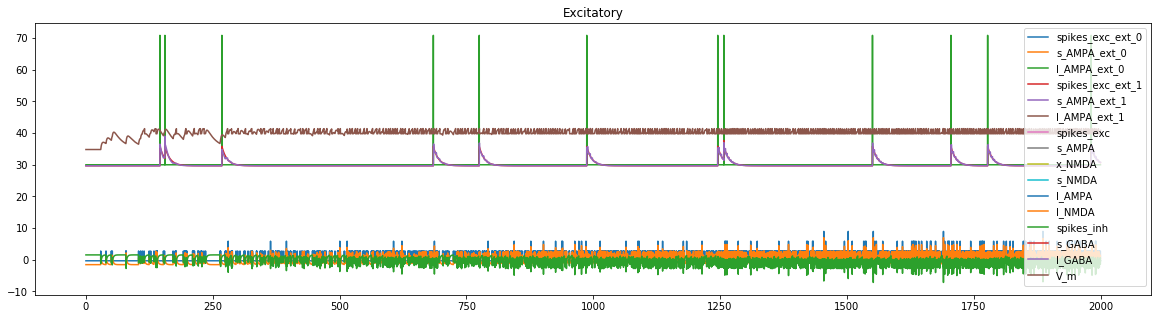

2020-01-09 11:53:09,295 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-09 11:53:09,586 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-09 11:53:09,771 - DEBUG - matplotlib.axes._base - update_title_pos
2020-01-09 11:53:09,860 - DEBUG - matplotlib.axes._base - update_title_pos


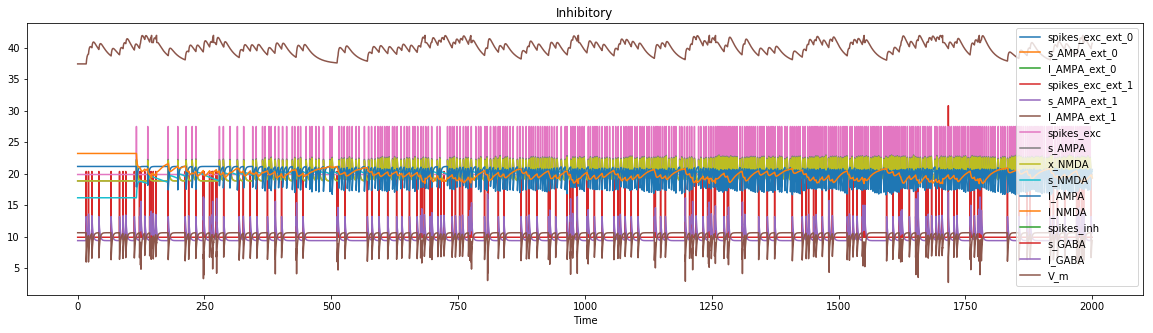

In [22]:
import pylab
from scipy.stats import zscore
dmex = nest_instance.GetStatus(mex)[0]
dminh = nest_instance.GetStatus(minh)[0]
tsex = dmex["events"]["times"]
tsin = dminh["events"]["times"]
# shape =  (int(len(ts)/2), 2)
# ts = np.reshape(ts, shape)
exc = ["spikes_exc", "s_AMPA", "x_NMDA", "s_NMDA", "I_AMPA", "I_NMDA"]
inh = ["spikes_inh", "s_GABA", "I_GABA"]
exc_ext1 = ["spikes_exc_ext_0", "s_AMPA_ext_0", "I_AMPA_ext_0"]
exc_ext2 = ["spikes_exc_ext_1", "s_AMPA_ext_1", "I_AMPA_ext_1"]
for ipop, (pop, dm) in enumerate(zip(["Excitatory", "Inhibitory"], [dmex, dminh])):
                               
    pylab.figure(ipop, figsize=[20, 5])
    
    for i_rec, record_from in enumerate([exc_ext1, exc_ext2, exc, inh, ["V_m"]]):
        offset = i_rec*10
        for var in record_from:
            y = dm["events"][var]
            # y = np.reshape(y, shape)
            try:
                pylab.plot(tsex, offset + zscore(y), label=var)
            except:
                pylab.plot(tsex, offset + y, label=var)
            
    pylab.title(pop)
    pylab.legend()
    
pylab.xlabel("Time")

In [ ]:
nest_instance.GetKernelStatus("time")

In [ ]:
dmex["events"]["spikes_exc_ext_0"]

In [ ]:
pylab.plot(tsex, offset + dminh["events"]["spikes_exc_ext_1"], label=var)